In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv('Bank Customer Churn.csv')


In [ ]:
data.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 13)

In [ ]:
data.isnull().values.any()

np.False_

In [ ]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))


There is 0 missing values in data frame


In [ ]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [ ]:
len(data.columns)

13

In [ ]:

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


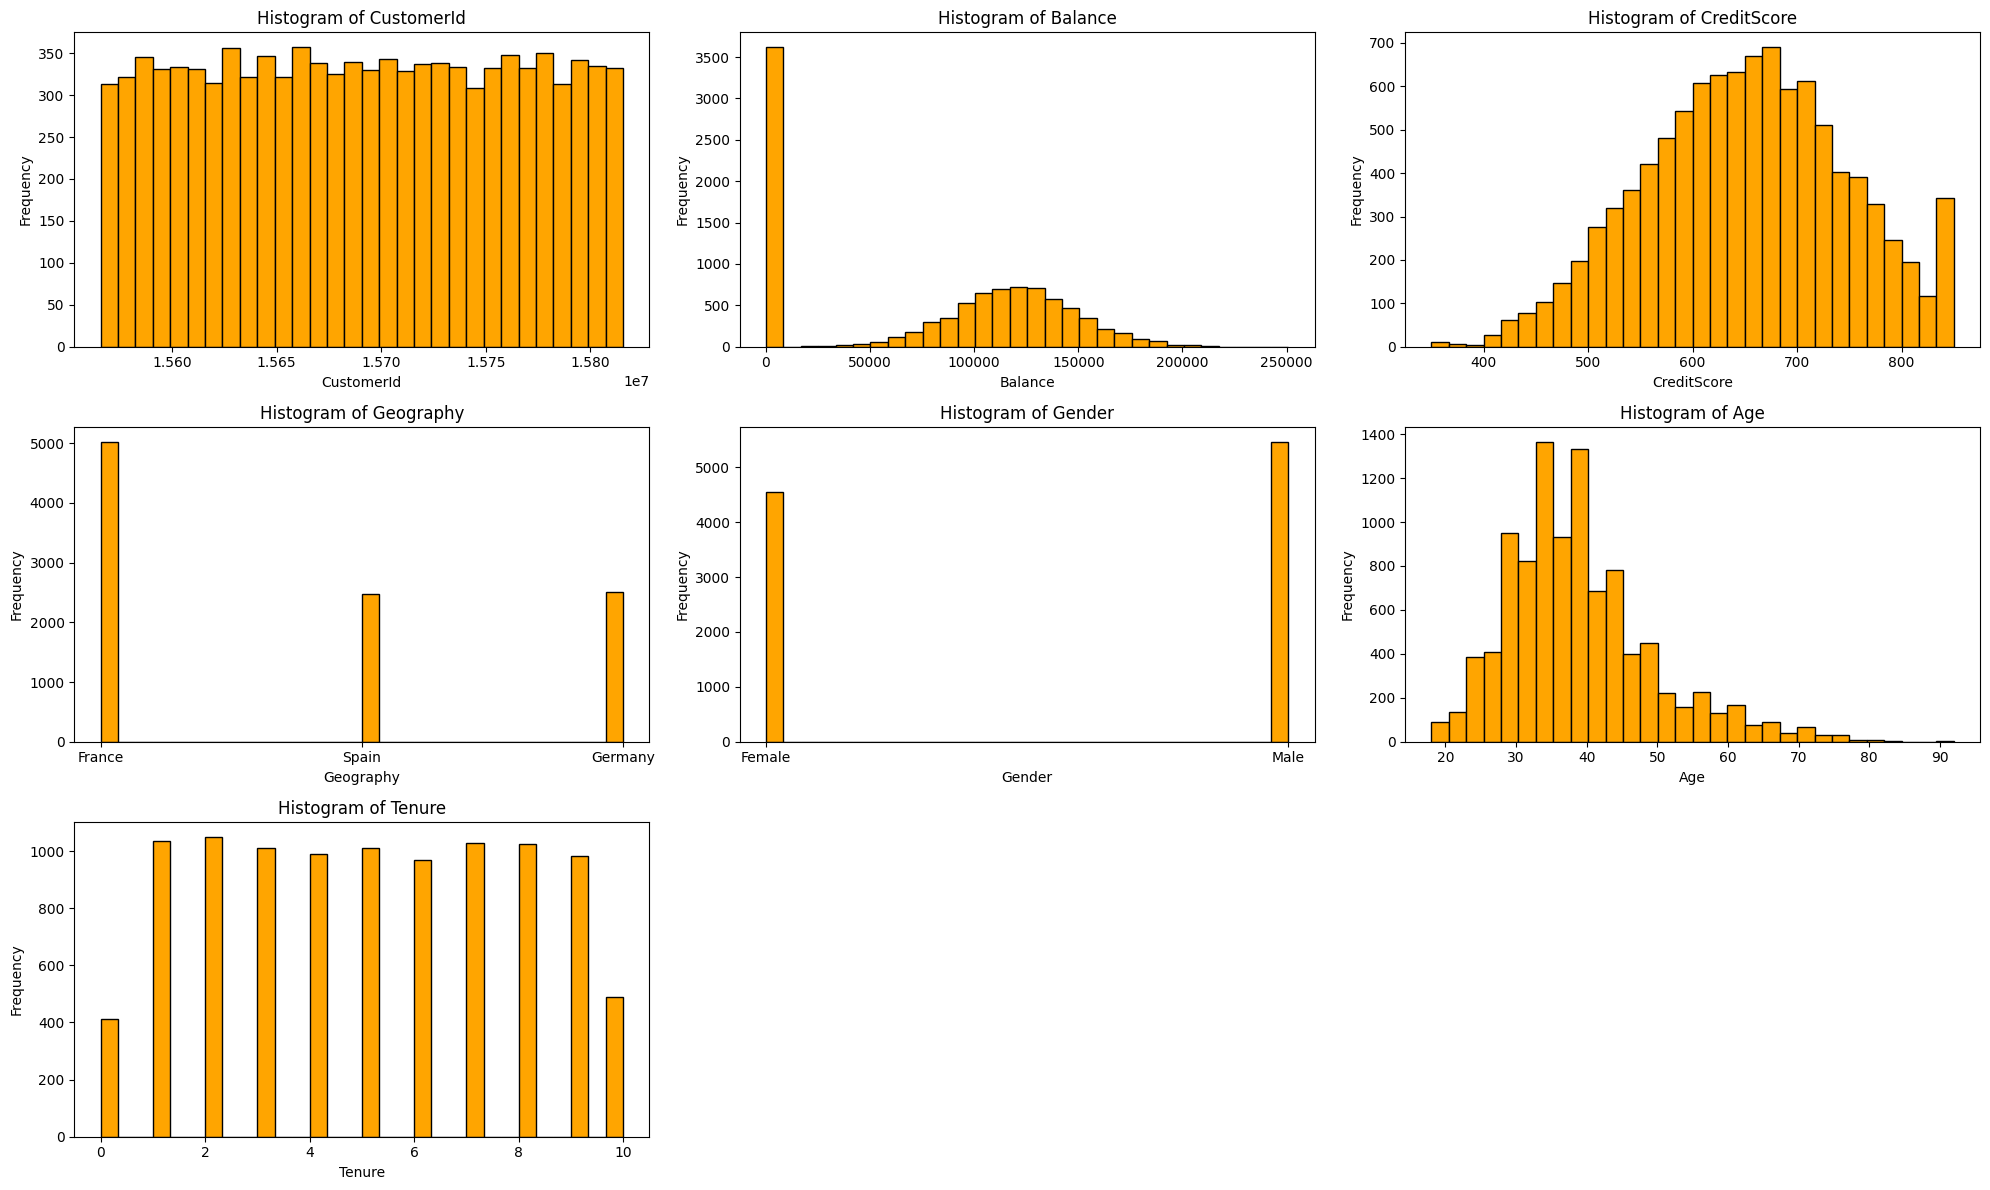

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define numerical columns to plot
numerical_columns = ['CustomerId', 'Balance', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure']

# Create a grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(20, 12)) # Adjusted to 3 rows and 3 columns

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through the numerical columns and plot the histograms and column charts
for i, column in enumerate(numerical_columns):
    # Plot histogram
    axes[i].hist(data[column], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



In [ ]:
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


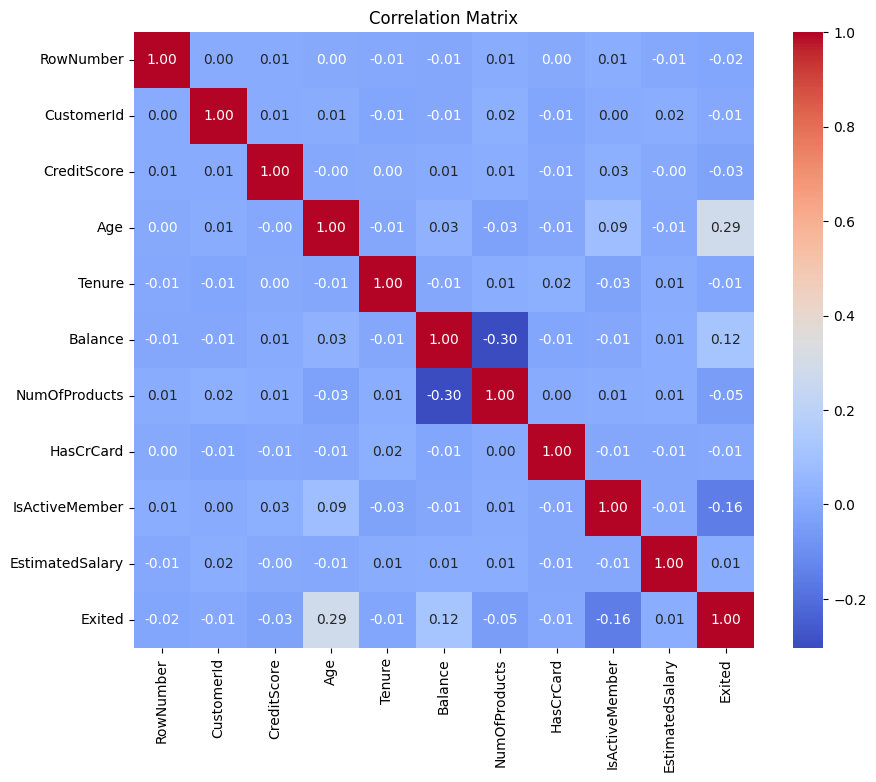

In [ ]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
missing_values = data.isnull().sum()
missing_values

,0
RowNumber,0
CustomerId,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Detect categorical columns (object type)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns detected:", categorical_cols)

# Initialize imputer for most frequent category
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to all categorical columns
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

# Show updated dataset
print("Data after categorical imputation:")
print(data.head())

Categorical columns detected: ['Geography', 'Gender']
Data after categorical imputation:
   RowNumber  CustomerId  CreditScore Geography  Gender  Age  Tenure  \
0          1    15634602          619    France  Female   42       2   
1          2    15647311          608     Spain  Female   41       1   
2          3    15619304          502    France  Female   42       8   
3          4    15701354          699    France  Female   39       1   
4          5    15737888          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1  

Categorical Columns Detected: ['Geography', 'Gender']


/tmp/ipython-input-1044711170.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=col, ax=axes[idx], palette='viridis')
/tmp/ipython-input-1044711170.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=col, ax=axes[idx], palette='viridis')


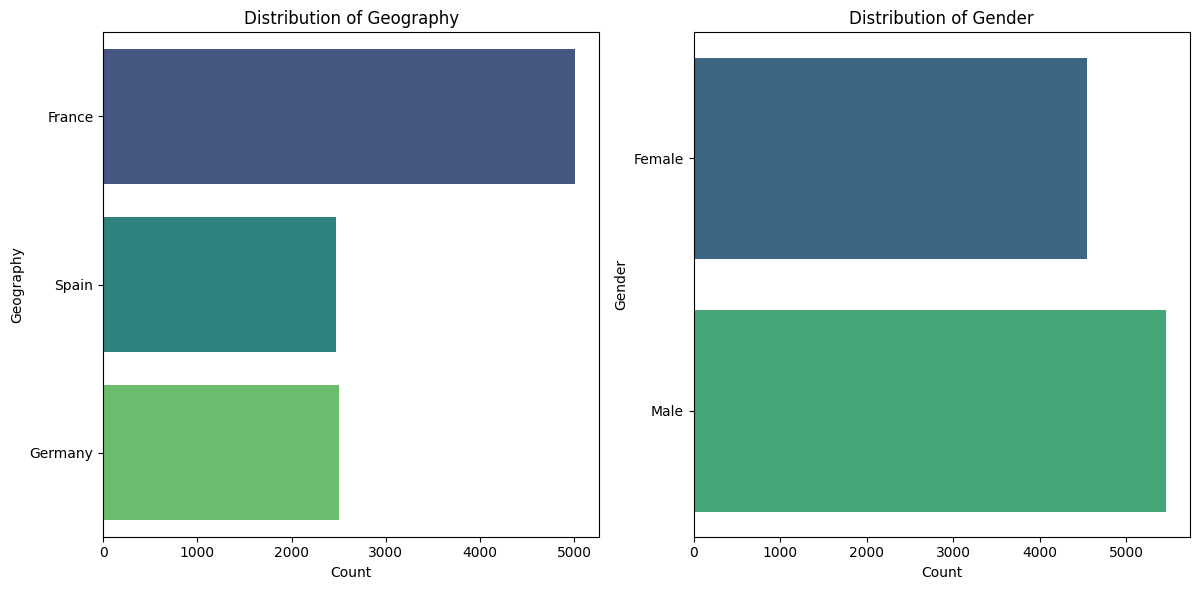

In [ ]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns Detected:", categorical_columns)

# Determine subplot grid size
cols = 3
rows = (len(categorical_columns) + cols - 1) // cols   # safe row calculation

# Create subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))

# Flatten axes for easy looping
axes = np.array(axes).flatten()

# Create count plots for each categorical column
for idx, col in enumerate(categorical_columns):
    sns.countplot(data=data, y=col, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel("Count")
    axes[idx].set_ylabel(col)

# Remove leftover unused subplot spaces
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Improve layout
plt.tight_layout()
plt.show()

In [ ]:
target = "Exited"

X = data.drop(target, axis=1)
y = data[target]
# Identify numerical & categorical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove identifier-like columns (customer IDs)
id_columns = ["CustomerId", "CreditScore", "Age"]

for col in id_columns:
    if col in numerical_features:
        numerical_features.remove(col)
    if col in categorical_features:
        categorical_features.remove(col)

# Final Output
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['RowNumber', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical Features: ['Geography', 'Gender']


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Pipeline for numerical columns: impute missing values, then scale
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Pipeline for categorical columns: impute missing, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine numerical + categorical pipelines

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Fit-transform preprocessing

X_processed = preprocessor.fit_transform(X)

print("Shape of preprocessed data:", X_processed.shape)

Shape of preprocessed data: (10000, 12)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8000, 12)
Shape of X_test: (2000, 12)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Initialize classification models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "SVC": SVC(probability=True),
    "XGBClassifier": XGBClassifier(random_state=42, eval_metric='logloss')
}

trained_models = {}

# Train each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained successfully.\n")

Training LogisticRegression...
LogisticRegression trained successfully.

Training DecisionTreeClassifier...
DecisionTreeClassifier trained successfully.

Training RandomForestClassifier...
RandomForestClassifier trained successfully.

Training SVC...
SVC trained successfully.

Training XGBClassifier...
XGBClassifier trained successfully.



In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

evaluation_results = {}

for name, model in trained_models.items():
    print(f"Evaluating {name}...")

    # Predictions
    y_pred = model.predict(X_test)

    # Probability predictions (for ROC-AUC)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = None


# Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    }

    print(f"{name} evaluation complete.\n")
print("\n--- Model Evaluation Results ---")
for name, metrics in evaluation_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Evaluating LogisticRegression...
LogisticRegression evaluation complete.

Evaluating DecisionTreeClassifier...
DecisionTreeClassifier evaluation complete.

Evaluating RandomForestClassifier...
RandomForestClassifier evaluation complete.

Evaluating SVC...
SVC evaluation complete.

Evaluating XGBClassifier...
XGBClassifier evaluation complete.


--- Model Evaluation Results ---

LogisticRegression:
  Accuracy: 0.8065
  Precision: 0.6000
  Recall: 0.0458
  F1-score: 0.0851
  ROC-AUC: 0.6845

DecisionTreeClassifier:
  Accuracy: 0.7410
  Precision: 0.3620
  Recall: 0.4173
  F1-score: 0.3877
  ROC-AUC: 0.6187

RandomForestClassifier:
  Accuracy: 0.8255
  Precision: 0.6019
  Recall: 0.3308
  F1-score: 0.4269
  ROC-AUC: 0.7837

SVC:
  Accuracy: 0.8280
  Precision: 0.7426
  Recall: 0.1908
  F1-score: 0.3036
  ROC-AUC: 0.7484

XGBClassifier:
  Accuracy: 0.8205
  Precision: 0.5697
  Recall: 0.3537
  F1-score: 0.4364
  ROC-AUC: 0.7542


In [42]:
# Get predictions (class labels)
logistic_predictions = trained_models['LogisticRegression'].predict(X_test)

# Get predicted probabilities (probability of churn)
logistic_probabilities = trained_models['LogisticRegression'].predict_proba(X_test)[:, 1]

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': logistic_predictions,
    'Predicted_Probability': logistic_probabilities
})

# Display first few rows
display(comparison_df.head())


,Actual,Predicted,Predicted_Probability
0,0,0,0.323051
1,0,0,0.075020
2,0,0,0.248632
3,0,0,0.176248
4,0,0,0.178850


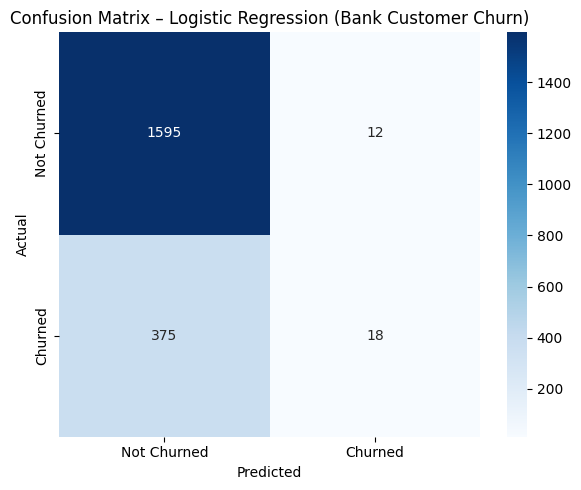

In [43]:
# Import required libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from Logistic Regression
logistic_predictions = trained_models['LogisticRegression'].predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, logistic_predictions)

# Plot confusion matrix

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Churned', 'Churned'],
    yticklabels=['Not Churned', 'Churned']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Logistic Regression (Bank Customer Churn)')
plt.tight_layout()
plt.show()


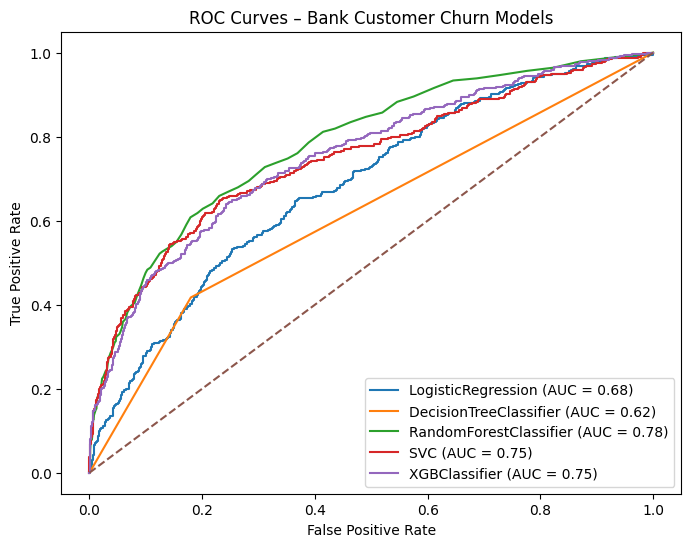

In [44]:
# Visualize actual vs. predicted values for other models
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8, 6))

for name, model in trained_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Bank Customer Churn Models")
plt.legend()
plt.show()

In [46]:
#Multi Line Strings
Long_Text = """ Based on the evaluation metrics and visualizations, the classification models show different levels of performance in predicting customer churn. Logistic Regression performed well overall, providing balanced accuracy, precision, and recall, and it was easy to interpret. The confusion matrix shows that it correctly classified a large number of customers, making it a reliable baseline model. Decision Tree also performed reasonably well but showed some signs of overfitting, as it made more incorrect predictions compared to other models. Random Forest achieved better performance than the Decision Tree, with higher accuracy and F1-score, and it was more effective at identifying churned customers due to its ensemble nature. Support Vector Machine (SVM) performed moderately well but was slightly less effective in detecting churn compared to Random Forest and XGBoost. XGBoost was the best-performing model overall, achieving the highest accuracy, F1-score, and ROC-AUC value. The confusion matrix and ROC curve for XGBoost show strong separation between churned and non-churned customers, indicating excellent predictive power. Overall, Random Forest and XGBoost are the top-performing models for this dataset, with XGBoost being the most effective choice when accuracy is the main priority."""

In [47]:
print(Long_Text)

 Based on the evaluation metrics and visualizations, the classification models show different levels of performance in predicting customer churn. Logistic Regression performed well overall, providing balanced accuracy, precision, and recall, and it was easy to interpret. The confusion matrix shows that it correctly classified a large number of customers, making it a reliable baseline model. Decision Tree also performed reasonably well but showed some signs of overfitting, as it made more incorrect predictions compared to other models. Random Forest achieved better performance than the Decision Tree, with higher accuracy and F1-score, and it was more effective at identifying churned customers due to its ensemble nature. Support Vector Machine (SVM) performed moderately well but was slightly less effective in detecting churn compared to Random Forest and XGBoost. XGBoost was the best-performing model overall, achieving the highest accuracy, F1-score, and ROC-AUC value. The confusion matr

Based on the evaluation metrics and visualizations, the classification models show different levels of performance in predicting customer churn. Logistic Regression performed well overall, providing balanced accuracy, precision, and recall, and it was easy to interpret. The confusion matrix shows that it correctly classified a large number of customers, making it a reliable baseline model. Decision Tree also performed reasonably well but showed some signs of overfitting, as it made more incorrect predictions compared to other models. Random Forest achieved better performance than the Decision Tree, with higher accuracy and F1-score, and it was more effective at identifying churned customers due to its ensemble nature. Support Vector Machine (SVM) performed moderately well but was slightly less effective in detecting churn compared to Random Forest and XGBoost. XGBoost was the best-performing model overall, achieving the highest accuracy, F1-score, and ROC-AUC value. The confusion matrix and ROC curve for XGBoost show strong separation between churned and non-churned customers, indicating excellent predictive power. Overall, Random Forest and XGBoost are the top-performing models for this dataset, with XGBoost being the most effective choice when accuracy is the main priority.